# 1. input data


In [0]:
#구글 드라이브 마운트
#from google.colab import drive
#drive.mount('/content/drive')

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0] # X,y값에 데이터 지정 (array)
y_data = data[:, 1]

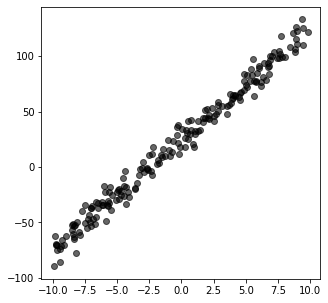

In [62]:
# x,y에 대해 scatter plot 그린다. 
plt.figure(figsize=(5, 5)) #scatter plot을 그린다. 
plt.plot(x_data, y_data, 'ko',alpha = 0.6)
plt.show()

# 2. Linear Regression
- input 데이터에 fit되는 reg.를 gradient descent방법으로 찾는다. (저번과제와 동일)

In [0]:
data = np.array([x_data,y_data]) #배열로 지정하여 값을 추가하기 위해 합친다

In [64]:
data #데이터 확인 

array([[-5.51841000e+00,  7.06369500e+00, -8.51561500e+00,
        -4.96235300e+00, -4.43572400e+00, -2.91480000e-01,
        -7.33927100e+00, -8.33790700e+00, -7.13295000e-01,
         2.55606100e+00,  2.98030000e-01,  3.67280000e+00,
         6.87352700e+00, -8.24238000e+00,  3.99805300e+00,
         9.35772000e+00,  8.77679000e-01,  2.34541600e+00,
        -5.04470000e+00, -7.02939800e+00, -5.89577900e+00,
        -1.33430000e-01,  9.83497200e+00, -1.89431700e+00,
        -1.07353800e+00,  2.86152000e+00,  6.16413200e+00,
        -7.02681500e+00,  7.58720200e+00, -7.22735400e+00,
         7.69556600e+00, -2.26094800e+00,  3.00040000e-01,
        -6.73849200e+00, -4.30599600e+00, -2.48718900e+00,
        -2.62987000e-01, -2.29135400e+00,  1.26406300e+00,
         9.46346300e+00, -6.73274000e-01, -3.48218900e+00,
         3.81297100e+00, -1.40105900e+00,  6.05747000e+00,
        -3.05823000e+00, -6.89302900e+00,  6.33183200e+00,
        -6.65507500e+00, -5.07775200e+00,  7.72995800e+0

In [0]:
X=np.transpose(np.array(data[:-1]))
y=np.transpose(np.array(data[-1:]))
m=y.size

In [0]:
#X에는 1을 가지는 열을 삽입한다. 
X=np.insert(X, 0,1, axis=1)

In [0]:
# X벡터값과 theta값을 받았을 때, 도출할 수 있는 linear model
def h(theta,X):
  return X.dot(theta)

In [0]:
# Objective function
def ObjectiveFunction(theta, X, y):
  return float((1./(2*m)) * np.dot((h(theta,X)-y).T,(h(theta,X)-y)))

In [69]:
# 초기 (theta0,theta1)값을 (-30,-30)으로 줌 
theta = np.array([[-30.],[-30.]])
theta

array([[-30.],
       [-30.]])

In [0]:
#theta = np.zeros([2,1])
#theta

In [71]:
X[:10] #10개만 확인 

array([[ 1.      , -5.51841 ],
       [ 1.      ,  7.063695],
       [ 1.      , -8.515615],
       [ 1.      , -4.962353],
       [ 1.      , -4.435724],
       [ 1.      , -0.29148 ],
       [ 1.      , -7.339271],
       [ 1.      , -8.337907],
       [ 1.      , -0.713295],
       [ 1.      ,  2.556061]])

In [72]:
# initialized theta에 대한 ObjectiveFunction계산
print(ObjectiveFunction(theta,X,y))

26495.76576415434


In [0]:
# Gradient descent using Objective function
iteration = 1500 #임의로 정한 하이퍼파라미터값(GradientDescent계산시 사용할 값 미리 지정)
alpha = 0.01

def GradientDescent(X, theta):
    #plotting위해 저장하는 history
    J_history = [] 
    theta_history = [] 

    #iteration
    for i in range(iteration):
        tmp = theta #동시에 update하기 위해선 교환하기 위한 새로운 변수가 필요
        
        J_history.append(ObjectiveFunction(theta,X,y))
        theta_history.append(list(theta[:,0]))

        #update theta
        for j in range(len(tmp)):
            tmp[j] = theta[j] - (alpha/m)*np.sum((h(theta,X) - y)*np.array(X[:,j]).reshape(m,1))
        theta = tmp #(theta0, theta1)하나의 벡터로 저장한다. 
    return theta, theta_history, J_history

In [0]:
# Gradient descent계산
theta, theta_history, J_history = GradientDescent(X,theta)

In [75]:
theta #확인

array([[24.90737567],
       [ 9.93463527]])

In [76]:
J_history[:10] #cost값 10개만 확인 

[26495.76576415434,
 12837.17527938191,
 6626.211931644767,
 3793.7062442137376,
 2493.8768854679324,
 1889.4896320884973,
 1600.7895047334316,
 1455.5311600302427,
 1375.5916526493847,
 1325.5384171673593]

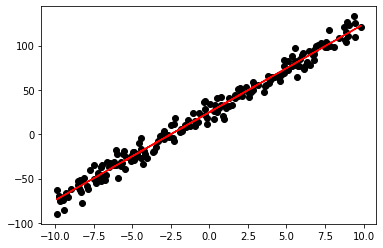

In [77]:
# fit되는 데이터 확인 
def final(x):
  return theta[0]+theta[1]*x

plt.plot(x_data, y_data, 'ko')
plt.plot(X[:,1], final(X[:,1]),'r')

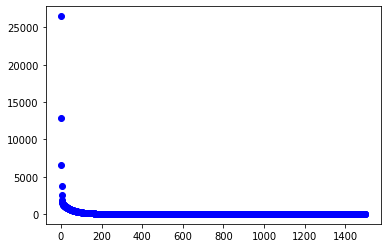

In [78]:
# cost값 plotting
plt.plot(range(len(J_history)),J_history,'bo')

In [0]:
theta0_history = [] 
theta1_history = []

for i in range(len(theta_history)):
  theta0_history.append(theta_history[i][1])
  theta1_history.append(theta_history[i][0])

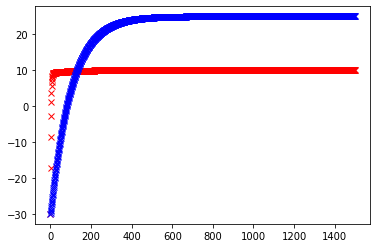

In [80]:
# plotting each parameter(theta0, theta1)
# 주의할 점은 각 theta별로 분리해서 plotting 해줘야 한다는 점. 
plt.plot(theta0_history,'rx') #theta0 값
plt.plot(theta1_history,'bx') #theta1 값 

# 3. visualize Energe function
- 가능한 $\theta$값에 대해 loss값을 찍는 형태로 전체 loss를 구성한다. 
- 정해진 범위 내의 theta0, theta1을 구하고 그에 해당하는 cost값을 전부 계산해야 한다. 
- gradient하는 과정 plotting한다. 

In [0]:
#x축에 theta0, y축에 theta1, z축에 cost값을 가진다. 
#여기선 history값이 아니라 전체 범위에 대한 각각의 값이 필요하다. 
theta0 = [] #-30~30의 값을 0.1간격으로 저장하는 리스트 
theta1 = [] #-30~30의 값을 0.1간격으로 저장하는 리스트 
cost_function = [] #각 theta에 해당하는 cost function을 저장하는 리스트 

for i in np.arange(-30,30,0.1):
  for j in np.arange(-30,30,0.1):
    theta0.append(i)
    theta1.append(j)
    cost = ObjectiveFunction(np.array([[i], [j]]),X,y)
    cost_function.append(cost)

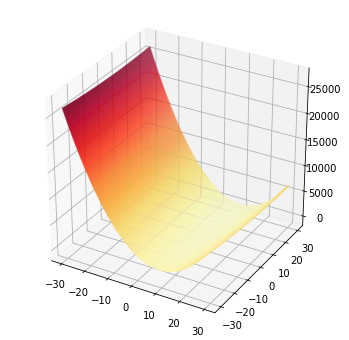

In [103]:
# theta0(x축), theta1(y축), cost_function(z축)을 가지로 3차원 그래프 plotting
#3D-surface형태로 시각화 
fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')
ax.scatter(theta0,theta1,cost_function,c=np.abs(cost_function),cmap=plt.get_cmap('YlOrRd'),s=0.01)

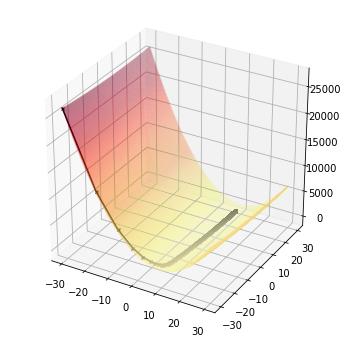

In [102]:
# gradient descent 과정의 visualize
fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')
ax.scatter(theta0,theta1,cost_function,c=np.abs(cost_function),cmap=plt.get_cmap('YlOrRd'),s=0.001)
plt.plot(theta0_history,theta1_history,J_history,'kx-',markersize=3)
plt.show()